In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
!pwd

/Users/trevormccaffrey/Desktop/git/VLA2022


In [22]:
dat = pd.read_csv("VLA2018b/grdr7_Shen2011_targ_uni.csv")
col = (dat["COL_FLAG"].values == 1)
z   = dat["REDSHIFT"].values ; zmask = ((z>1.65)&(z<1.75))
dat = dat[col&zmask]

In [23]:
dat

,Name,RA_1,Dec_1,SDSS_NAME,RA_2,DEC_2,REDSHIFT,TARGET_FLAG_TARGET,UNIFORM_TARGET,COL_FLAG,MI_Z2,BAL_FLAG,FIRST_FR_TYPE,FINT_REST6CM_MJY_OBS,LOGFNU2500A_ERGS_OBS,R_6CM_2500A,LOGL3000,LOGL1350,Separation
2,SDSSJ101033.44-004724.5,152.639355,-0.790145,101033.44-004724.5,152.639359,-0.790145,1.6675,4.0,0.0,1,-27.539811,1.0,0.0,0.0,-26.595548,-1.0,46.320115,46.390352,0.012673
3,SDSSJ101100.92+002039.4,152.753859,0.344291,101100.92+002039.4,152.753860,0.344291,1.7487,1048580.0,0.0,1,-26.907112,0.0,0.0,0.0,-26.916640,-1.0,46.001362,46.245062,0.005305
13,SDSSJ103421.22-003732.3,158.588421,-0.625647,103421.22-003732.3,158.588425,-0.625647,1.7214,4.0,0.0,1,-26.750432,0.0,0.0,0.0,-26.942402,-1.0,45.943008,46.216624,0.013257
14,SDSSJ103744.44+002809.2,159.435201,0.469243,103744.44+002809.2,159.435196,0.469243,1.7327,1048580.0,0.0,1,-27.427915,0.0,0.0,0.0,-26.565769,-1.0,46.379951,46.498485,0.018277
16,SDSSJ104828.81-005747.0,162.120046,-0.963066,104828.81-005747.0,162.120041,-0.963066,1.7355,1048580.0,0.0,1,-27.357230,0.0,0.0,0.0,-26.661061,-1.0,46.233071,46.485369,0.018381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,SDSSJ105210.44+233156.1,163.043518,23.532251,105210.44+233156.1,163.043518,23.532251,1.6918,1048579.0,1.0,1,-26.144643,0.0,0.0,0.0,-27.255602,-1.0,45.745789,45.523501,0.001307
8634,SDSSJ130130.85+271620.2,195.378575,27.272297,130130.85+271620.2,195.378571,27.272297,1.7204,3.0,1.0,1,-26.393477,0.0,0.0,0.0,-27.089086,-1.0,45.862163,45.908394,0.014222
8636,SDSSJ125708.44+271330.6,194.285185,27.225168,125708.44+271330.6,194.285187,27.225168,1.6643,7171.0,1.0,1,-26.985491,0.0,0.0,0.0,-26.792759,-1.0,46.137536,46.064199,0.005718
8637,SDSSJ125818.44+275936.3,194.576866,27.993439,125818.44+275936.3,194.576859,27.993439,1.7233,2.0,1.0,1,-26.328256,0.0,0.0,0.0,-27.102920,-1.0,45.815739,45.954764,0.023797


In [24]:
ra = dat["RA_1"].values
dec= dat["Dec_1"].values

In [25]:
RA_deg = coord.Angle(ra, unit=u.hour).degree
DEC_deg = coord.Angle(dec, unit=u.degree).degree

In [26]:
coords = SkyCoord(RA_deg, DEC_deg, unit=u.degree)

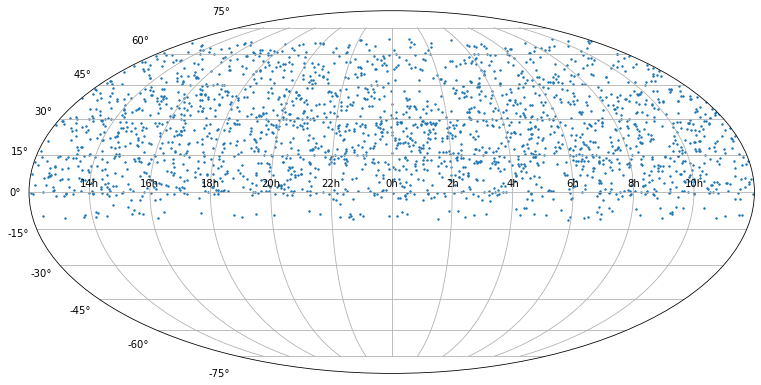

In [27]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coords.ra.wrap_at(180*u.degree).radian, coords.dec.radian, s=2)
#ax.scatter(eq34.ra.wrap_at(180*u.degree).radian, eq34.dec.radian, c="r", s=5, alpha=0.05)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
plt.grid(True)

Want a long strip of RA to get volume-complete sample. See how many are in cuts of 2 degrees.

In [28]:
ra, dec

(array([152.639355, 152.753859, 158.588421, ..., 194.285185, 194.576866,
        234.801363]),
 array([-0.790145,  0.344291, -0.625647, ..., 27.225168, 27.993439,
        15.468401]))

In [29]:
dec.min(), dec.max()

(-11.138894, 68.339545)

(array([23., 29., 15.,  5.,  6., 28., 77., 88., 54., 46., 51., 61., 44.,
        53., 81., 74., 74., 65., 65., 52., 61., 52., 59., 68., 87., 66.,
        56., 50., 57., 45., 42., 58., 53., 44., 33., 39., 32., 36., 25.,
        30., 29., 31., 33., 26., 28., 27., 15., 22., 14.,  7.]),
 array([-1.11388940e+01, -9.54932522e+00, -7.95975644e+00, -6.37018766e+00,
        -4.78061888e+00, -3.19105010e+00, -1.60148132e+00, -1.19125400e-02,
         1.57765624e+00,  3.16722502e+00,  4.75679380e+00,  6.34636258e+00,
         7.93593136e+00,  9.52550014e+00,  1.11150689e+01,  1.27046377e+01,
         1.42942065e+01,  1.58837753e+01,  1.74733440e+01,  1.90629128e+01,
         2.06524816e+01,  2.22420504e+01,  2.38316192e+01,  2.54211879e+01,
         2.70107567e+01,  2.86003255e+01,  3.01898943e+01,  3.17794631e+01,
         3.33690318e+01,  3.49586006e+01,  3.65481694e+01,  3.81377382e+01,
         3.97273070e+01,  4.13168757e+01,  4.29064445e+01,  4.44960133e+01,
         4.60855821e+01,  4.7675

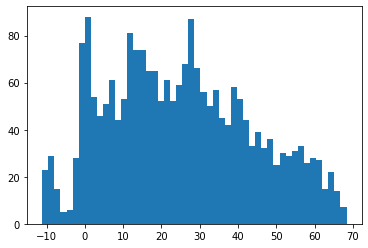

In [33]:
plt.hist(dec, bins=50)

In [62]:
dphi = 5
for i in np.arange(-16, 70, dphi):
    print("%3d < Dec < %3d: %4d" % (i, i+dphi, ((dec>i)&(dec<(i+dphi))).sum()))

-16 < Dec < -11:    1
-11 < Dec <  -6:   69
 -6 < Dec <  -1:   51
 -1 < Dec <   4:  225
  4 < Dec <   9:  166
  9 < Dec <  14:  207
 14 < Dec <  19:  219
 19 < Dec <  24:  171
 24 < Dec <  29:  228
 29 < Dec <  34:  175
 34 < Dec <  39:  152
 39 < Dec <  44:  152
 44 < Dec <  49:  108
 49 < Dec <  54:   88
 54 < Dec <  59:   93
 59 < Dec <  64:   73
 64 < Dec <  69:   38
 69 < Dec <  74:    0


In [64]:
((dec>45)&(dec<50)).sum()

116

In [46]:
decmask = ((dec>26)&(dec<28))
sample  = dat[decmask]

In [47]:
sample

,Name,RA_1,Dec_1,SDSS_NAME,RA_2,DEC_2,REDSHIFT,TARGET_FLAG_TARGET,UNIFORM_TARGET,COL_FLAG,MI_Z2,BAL_FLAG,FIRST_FR_TYPE,FINT_REST6CM_MJY_OBS,LOGFNU2500A_ERGS_OBS,R_6CM_2500A,LOGL3000,LOGL1350,Separation
1775,SDSSJ075331.84+270415.3,118.382672,27.070919,075331.84+270415.3,118.382675,27.070919,1.6550,1048578.0,1.0,1,-26.683146,0.0,0.0,0.0,-26.967370,-1.0,45.884245,46.164535,0.010165
1776,SDSSJ075748.09+273128.3,119.450415,27.524537,075748.09+273128.3,119.450417,27.524536,1.7463,3.0,1.0,1,-26.469123,0.0,0.0,0.0,-27.072144,-1.0,45.865623,46.041253,0.005891
1777,SDSSJ075230.44+272619.8,118.126854,27.438842,075230.44+272619.8,118.126854,27.438843,1.7176,3.0,1.0,1,-27.005397,0.0,0.0,0.0,-26.887336,-1.0,46.028566,46.154660,0.002790
1873,SDSSJ073733.16+274820.2,114.388194,27.805628,073733.16+274820.2,114.388191,27.805628,1.7385,1048579.0,1.0,1,-26.517635,0.0,0.0,0.0,-27.014516,-1.0,45.923894,46.196817,0.008865
2045,SDSSJ080323.76+275939.7,120.849034,27.994375,080323.76+275939.7,120.849037,27.994375,1.7448,1048579.0,1.0,1,-26.646184,0.0,0.0,0.0,-27.055240,-1.0,45.844830,46.068863,0.010112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,SDSSJ105448.68+275749.6,163.702868,27.963792,105448.68+275749.6,163.702866,27.963793,1.6504,1048578.0,1.0,1,-27.234272,0.0,0.0,0.0,-26.698067,-1.0,46.168047,46.339273,0.008156
8591,SDSSJ105014.01+275230.2,162.558402,27.875067,105014.01+275230.2,162.558395,27.875067,1.7123,2.0,1.0,1,-27.192865,0.0,0.0,0.0,-26.640063,-1.0,46.270650,46.450830,0.021067
8634,SDSSJ130130.85+271620.2,195.378575,27.272297,130130.85+271620.2,195.378571,27.272297,1.7204,3.0,1.0,1,-26.393477,0.0,0.0,0.0,-27.089086,-1.0,45.862163,45.908394,0.014222
8636,SDSSJ125708.44+271330.6,194.285185,27.225168,125708.44+271330.6,194.285187,27.225168,1.6643,7171.0,1.0,1,-26.985491,0.0,0.0,0.0,-26.792759,-1.0,46.137536,46.064199,0.005718


In [51]:
(sample["FINT_REST6CM_MJY_OBS"]==0).sum()

97

In [55]:
ra_good = sample["RA_1"].values
dec_good = sample["Dec_1"].values
RA_deg_good = coord.Angle(ra_good, unit=u.hour).degree
DEC_deg_good = coord.Angle(dec_good, unit=u.degree).degree
coords_good = SkyCoord(RA_deg_good, DEC_deg_good, unit=u.degree)

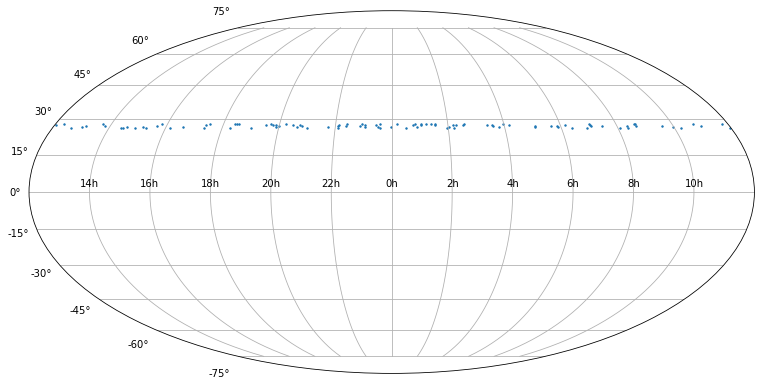

In [59]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coords_good.ra.wrap_at(180*u.degree).radian, coords_good.dec.radian, s=2)
#ax.scatter(eq34.ra.wrap_at(180*u.degree).radian, eq34.dec.radian, c="r", s=5, alpha=0.05)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
plt.grid(True)

In [57]:
ax.get_ylim()

(-1.5707963267948966, 1.5707963267948966)